In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns
import missingno as msno

In [3]:
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum
 

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [5]:
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

In [7]:
patient_indonesia = pd.read_csv("patient.csv")

In [8]:
patient_indonesia = patient_indonesia[patient_indonesia["age"].notnull()]
#age에 data가 없는 열을 지움

In [9]:
column_name = ["patient_id", "gender", "age", "current_state"]

In [10]:
patient_indonesia = patient_indonesia[column_name]
#필요없는 column 지움

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


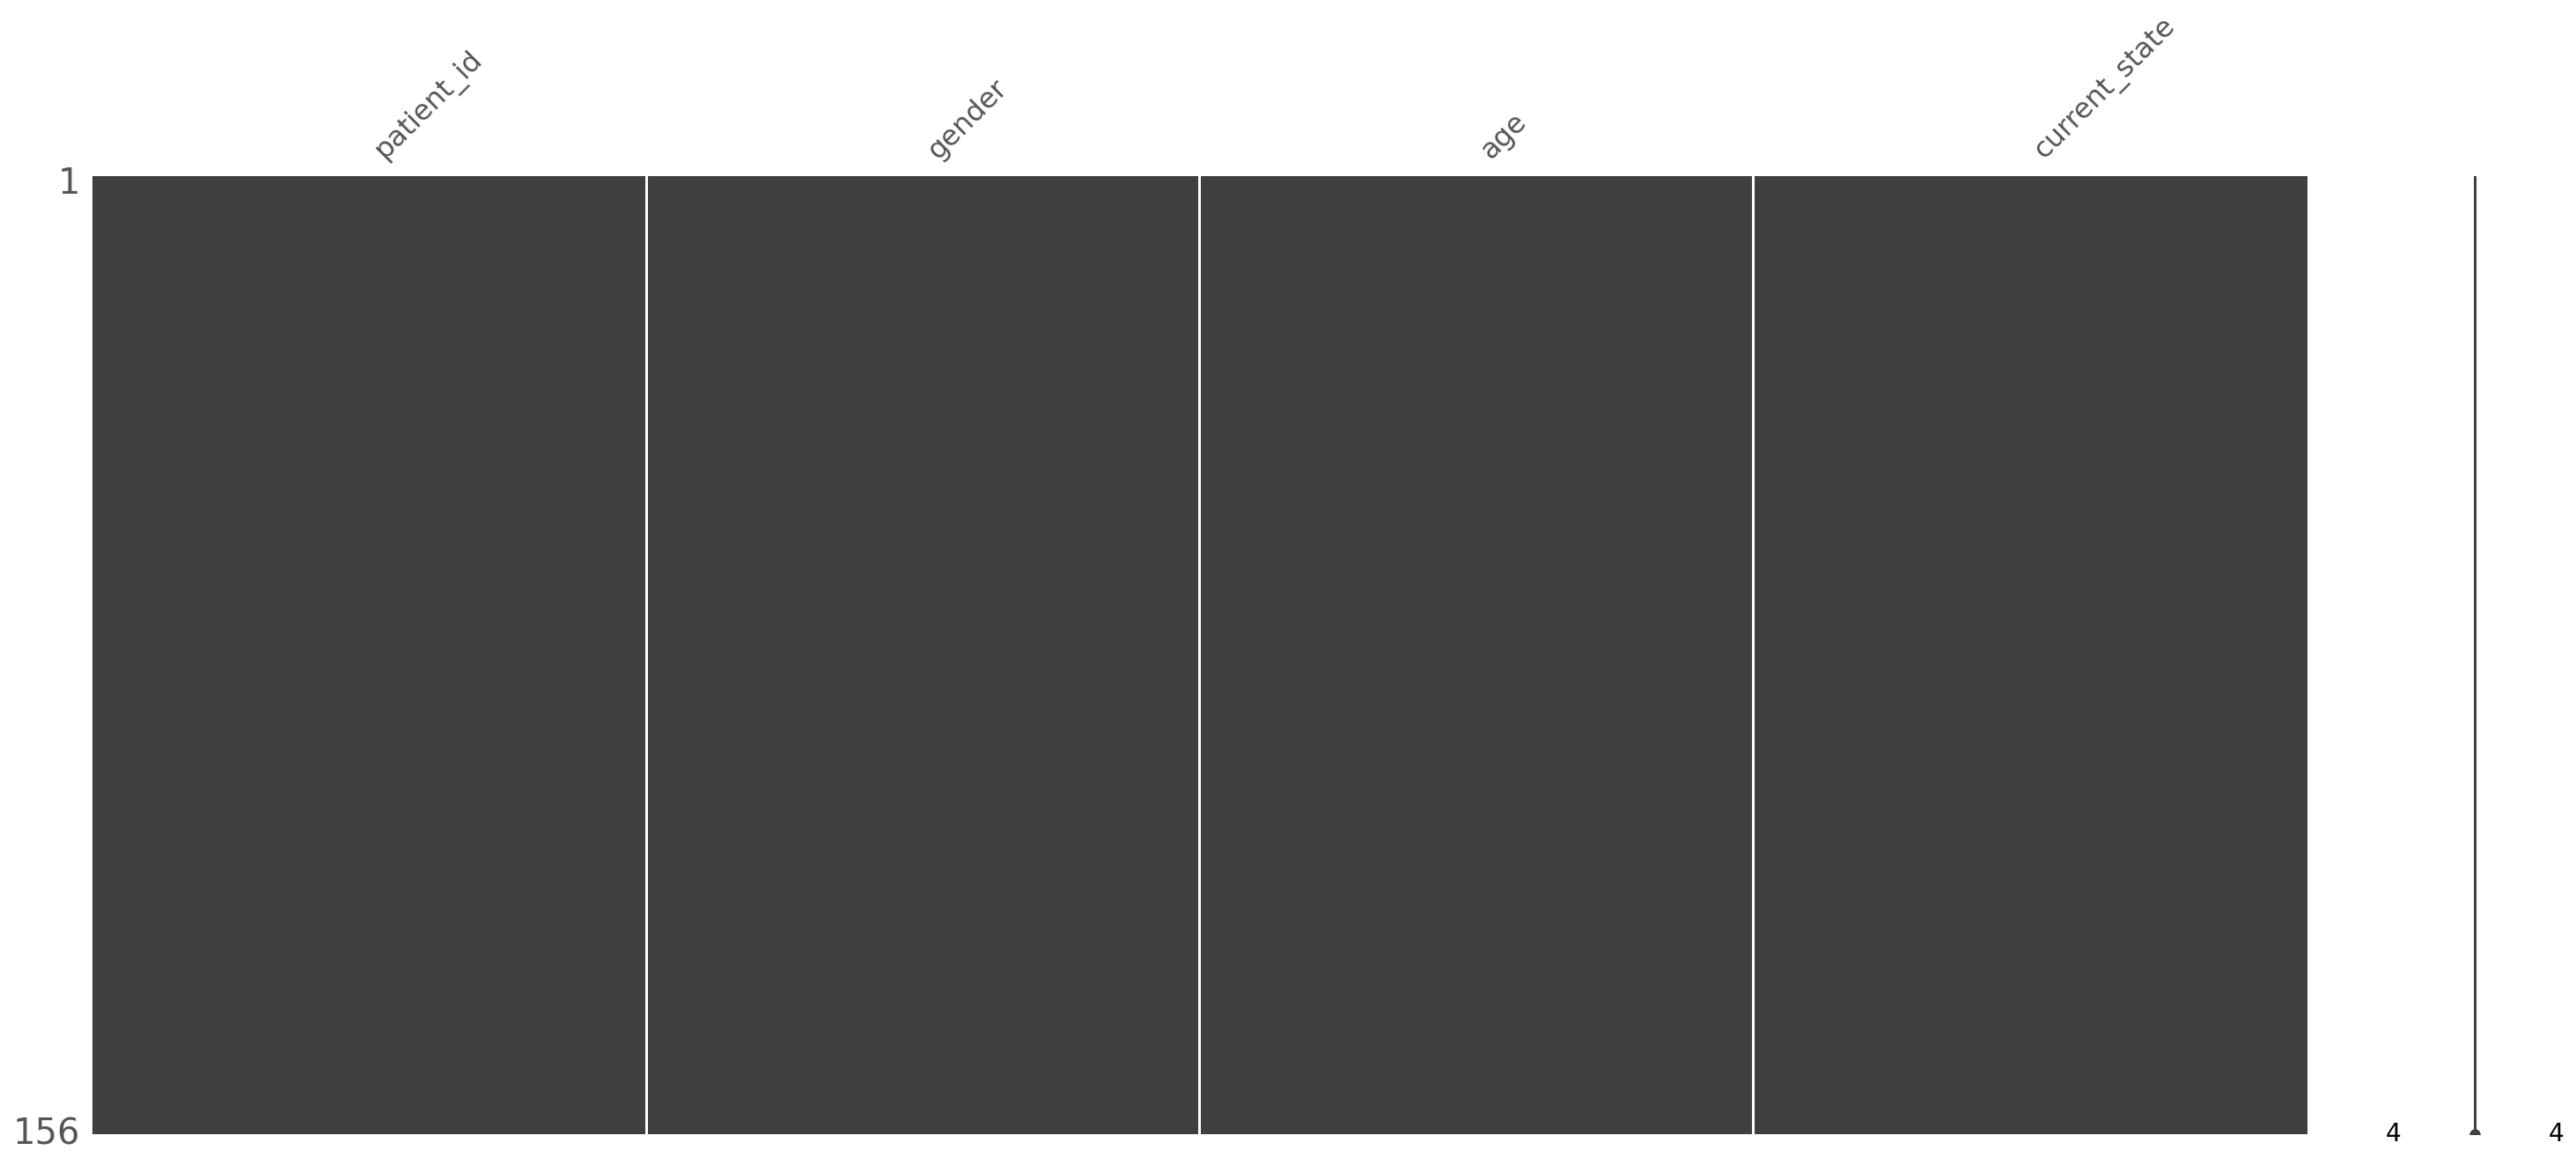

In [11]:
msno.matrix(patient_indonesia)
#공백있는지 확인

In [12]:
patient_indonesia["age"] = patient_indonesia["age"].astype(str)
#age를 문자열 형태로 변환

In [13]:
patient_indonesia_elder = pd.concat([patient_indonesia[patient_indonesia["age"].str.startswith("6")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("7")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("8")]])
#인도네시아 노년층 데이터 병합

In [14]:
patient_indonesia_elder["age"] = patient_indonesia_elder["age"].astype(float)
#문자열을 다시 실수형으로 변환

In [15]:
patient_indonesia["age"] = patient_indonesia["age"].astype(float)

In [16]:
patient_indonesia_baby = patient_indonesia[patient_indonesia["age"] < 10.0]
#10세 이하만 추출

In [17]:
patient_indonesia_elder["lethality"] = 4/38 * 100
#치사율 데이터 생성

In [18]:
patient_indonesia_baby

,patient_id,gender,age,current_state
48,49,male,3.0,isolated
53,54,male,2.0,isolated


In [20]:
patient_indonesia["age"] = patient_indonesia["age"].astype(str)

In [21]:
patient_indonesia_young = pd.concat([patient_indonesia[patient_indonesia["age"].str.startswith("1")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("2")] 
                                    ])
#1, 2 로 시작하는 age값 추출

In [22]:
patient_indonesia_young.drop(53, axis=0, inplace=True)
#행이름 53 삭제

In [23]:
patient_indonesia_middle = pd.concat([patient_indonesia[patient_indonesia["age"].str.startswith("3")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("4")], 
                                      patient_indonesia[patient_indonesia["age"].str.startswith("5")]
                                    ])
#3, 4, 5 로 시작하는 age값 추출

In [24]:
patient_indonesia_middle.drop(48, axis=0, inplace=True)
#행이름 48 삭제

In [25]:
patient_indonesia_middle["lethality"] = 11/(78+11+6) * 100
#치사율 계산

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


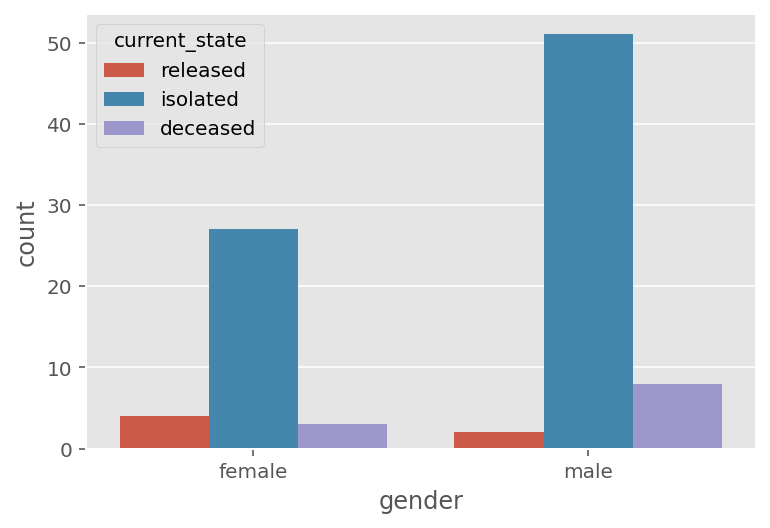

In [26]:
sns.countplot(data=patient_indonesia_middle, x="gender", hue="current_state")

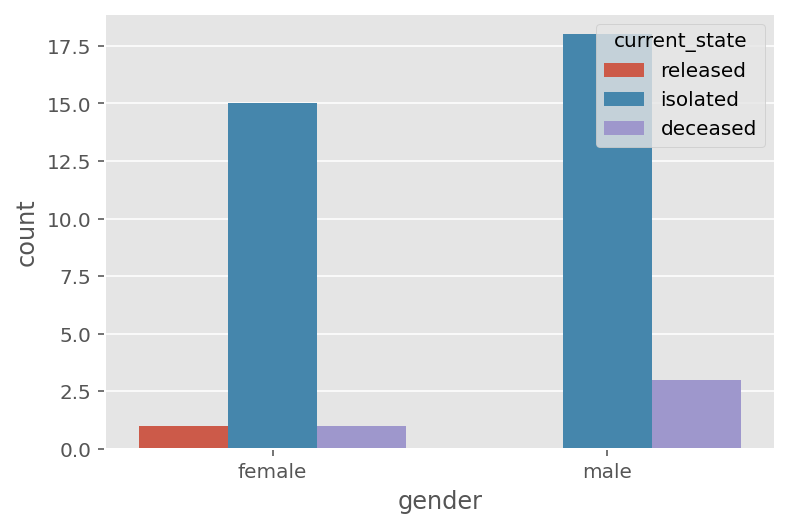

In [28]:
sns.countplot(data=patient_indonesia_elder, x="gender", hue="current_state")